# Reading the Data and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ignore_warnings

In [2]:
df_rain = pd.read_csv('/Users/senakshikrishnamurthy/Desktop/Sena/Project/Rainfall_analysis/d7b0dc22-053d-4a91-8e90-2f8b2ab794e4/data/climate_sirsi_westernghats.csv')

/var/folders/7c/z12nzz6s19zbls8hvs28v8tw0000gn/T/ipykernel_72134/3004174456.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rain = pd.read_csv('/Users/senakshikrishnamurthy/Desktop/Sena/Project/Rainfall_analysis/d7b0dc22-053d-4a91-8e90-2f8b2ab794e4/data/climate_sirsi_westernghats.csv')


In [3]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75747 entries, 0 to 75746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62960 non-null  object 
 1   Time               62960 non-null  object 
 2   RH %               75747 non-null  float64
 3   AirTemp_degC       62960 non-null  float64
 4   Precip_mm/10 mins  62960 non-null  float64
 5   WindDir_deg        62960 non-null  float64
 6   WindGust_km/hr     62960 non-null  float64
 7   DewPoint_DegC      62960 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.6+ MB


In [4]:
# Display the first few rows of the dataframe
df_rain.head()

,Date,Time,RH %,AirTemp_degC,Precip_mm/10 mins,WindDir_deg,WindGust_km/hr,DewPoint_DegC
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1


In [5]:
print("Shape before cleaning:", df_rain.shape)


Shape before cleaning: (75747, 8)


In [6]:
# Drop columns with all missing values
df_rain.dropna(axis=1, how='all', inplace=True)

In [7]:

# Fill missing values
for col in df_rain.columns:
    if df_rain[col].dtype == 'object':
        df_rain[col].fillna(df_rain[col].mode()[0])
    else:
        df_rain[col].fillna(df_rain[col].mean())

In [8]:
# Drop duplicates
df_rain.drop_duplicates(inplace=True)

In [9]:
df_rain

,Date,Time,RH %,AirTemp_degC,Precip_mm/10 mins,WindDir_deg,WindGust_km/hr,DewPoint_DegC
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1
...,...,...,...,...,...,...,...,...
71867,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN
71868,NaN,NaN,61.2,NaN,NaN,NaN,NaN,NaN
71869,NaN,NaN,61.3,NaN,NaN,NaN,NaN,NaN
71884,NaN,NaN,60.8,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Shape after cleaning:", df_rain.shape)

Shape after cleaning: (63323, 8)


In [11]:
# ----- Basic Info -----
print("\nBasic Info:")
print(df_rain.info())

print("\nSummary Statistics:")
print(df_rain.describe(include='all'))


Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 63323 entries, 0 to 71887
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62960 non-null  object 
 1   Time               62960 non-null  object 
 2   RH %               63323 non-null  float64
 3   AirTemp_degC       62960 non-null  float64
 4   Precip_mm/10 mins  62960 non-null  float64
 5   WindDir_deg        62960 non-null  float64
 6   WindGust_km/hr     62960 non-null  float64
 7   DewPoint_DegC      62960 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.3+ MB
None

Summary Statistics:
              Date  Time           RH %  AirTemp_degC  Precip_mm/10 mins  \
count        62960  62960  63323.000000  62960.000000       62960.000000   
unique         439    144           NaN           NaN                NaN   
top     17/09/2021  05:40           NaN           NaN                NaN   
freq           144    

                       RH %  AirTemp_degC  Precip_mm/10 mins  WindDir_deg  \
RH %               1.000000     -0.816068           0.091092    -0.099211   
AirTemp_degC      -0.816068      1.000000          -0.038577     0.007384   
Precip_mm/10 mins  0.091092     -0.038577           1.000000    -0.041546   
WindDir_deg       -0.099211      0.007384          -0.041546     1.000000   
WindGust_km/hr    -0.198886      0.191893           0.014635    -0.025495   
DewPoint_DegC     -0.092454      0.631631           0.053110    -0.173897   

                   WindGust_km/hr  DewPoint_DegC  
RH %                    -0.198886      -0.092454  
AirTemp_degC             0.191893       0.631631  
Precip_mm/10 mins        0.014635       0.053110  
WindDir_deg             -0.025495      -0.173897  
WindGust_km/hr           1.000000       0.119226  
DewPoint_DegC            0.119226       1.000000  


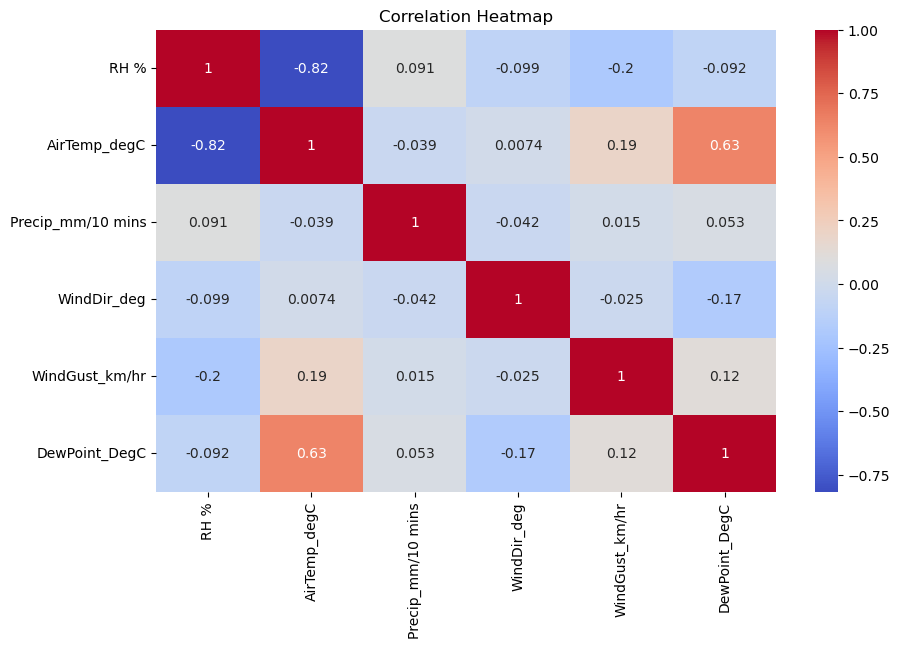

In [12]:
# Correlation heatmap (only for numeric columns)
numeric_df = df_rain.select_dtypes(include=['int64', 'float64'])
print(numeric_df.corr())

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### Results :
|Variable |	Strongly | Correlated With	Notes|
|---------|----------|-------------------------------------|
 |RH %|	AirTemp_degC (-0.82)|	As temp goes up, RH goes down
|AirTemp_degC |	DewPoint_DegC (+0.63) |	Warmer air = higher dew point|
|Precip_mm/10m| (No strong correlations) |	Rainfall is complex — not linearly tied to |one feature
|WindGust_km/hr | (Weak trends) |	Slightly warmer temps and lower humidity|

### Feature Engineerning


In [13]:
# ----------------------------
# 1. DATETIME FEATURE ENGINEERING
# ----------------------------

# Clean column names: lowercase, remove spaces
df_rain.columns = df_rain.columns.str.strip().str.replace(' ', '_').str.lower()

# Create 'datetime' column from 'date'
df_rain['datetime'] = pd.to_datetime(df_rain['date'] + ' ' + df_rain['time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extract time-based features
df_rain['hour'] = df_rain['datetime'].dt.hour
df_rain['minute'] = df_rain['datetime'].dt.minute
df_rain['time_of_day'] = df_rain['hour'].apply(
    lambda h: 'Night' if h < 6 else 'Morning' if h < 12 else 'Afternoon' if h < 18 else 'Evening'
)

# Extract date-related features
df_rain['day'] = df_rain['datetime'].dt.day
df_rain['month'] = df_rain['datetime'].dt.month
df_rain['year'] = df_rain['datetime'].dt.year

# ----------------------------
# 2. CLIMATE-DERIVED FEATURES
# ----------------------------

# Categorize Humidity: Low, Medium, High
def categorize_rh(rh):
    if rh < 40:
        return 'Low'
    elif rh < 70:
        return 'Medium'
    else:
        return 'High'

df_rain['rh_category'] = df_rain['rh_%'].apply(categorize_rh)

# Temperature-Humidity Index (a simple "feels like" temp formula)
df_rain['temp_humidity_index'] = df_rain['airtemp_degc'] + 0.33 * df_rain['rh_%'] - 0.70

# Wind chill (only applies when temp < 10°C and wind > 4.8 km/h)
def wind_chill(temp, wind):
    if temp < 10 and wind > 4.8:
        return 13.12 + 0.6215 * temp - 11.37 * (wind**0.16) + 0.3965 * temp * (wind**0.16)
    return temp

df_rain['wind_chill'] = df_rain.apply(
    lambda row: wind_chill(row['airtemp_degc'], row['windgust_km/hr']), axis=1
)


In [14]:
# Remove duplicated engineered columns
df = df_rain.loc[:, ~df_rain.columns.duplicated()]


In [15]:
# Drop rows where 'datetime' or 'airtemp_degc' is missing
df_cleaned = df_rain.dropna(subset=['datetime', 'airtemp_degc', 'rh_%', 'precip_mm/10_mins'])

# Optional: Reset index
df_cleaned = df_cleaned.reset_index(drop=True)


In [16]:
df_cleaned

,date,time,rh_%,airtemp_degc,precip_mm/10_mins,winddir_deg,windgust_km/hr,dewpoint_degc,datetime,hour,minute,time_of_day,day,month,year,rh_category,temp_humidity_index,wind_chill
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5,2021-02-10 17:40:00,17.0,40.0,Afternoon,10.0,2.0,2021.0,Medium,45.867,26.8
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5,2021-02-10 17:50:00,17.0,50.0,Afternoon,10.0,2.0,2021.0,Medium,45.993,26.2
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9,2021-02-10 18:00:00,18.0,0.0,Evening,10.0,2.0,2021.0,Medium,46.617,25.9
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2,2021-02-10 18:10:00,18.0,10.0,Evening,10.0,2.0,2021.0,High,47.300,24.9
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1,2021-02-10 18:20:00,18.0,20.0,Evening,10.0,2.0,2021.0,High,47.458,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62955,24/04/2022,10:20,76.9,31.3,0.0,304.0,0.0,25.3,2022-04-24 10:20:00,10.0,20.0,Morning,24.0,4.0,2022.0,High,55.977,31.3
62956,24/04/2022,10:30,78.1,30.7,0.0,338.0,0.0,25.0,2022-04-24 10:30:00,10.0,30.0,Morning,24.0,4.0,2022.0,High,55.773,30.7
62957,24/04/2022,10:40,79.4,29.9,0.0,338.0,0.0,24.5,2022-04-24 10:40:00,10.0,40.0,Morning,24.0,4.0,2022.0,High,55.402,29.9
62958,24/04/2022,10:50,77.4,30.7,0.0,338.0,0.0,24.8,2022-04-24 10:50:00,10.0,50.0,Morning,24.0,4.0,2022.0,High,55.542,30.7


In [17]:
df_encoded = df_cleaned.copy()

for col in df_encoded.columns:
    try:
        if df_encoded[col].isnull().any():
            df_encoded[f"{col}_missing"] = df_encoded[col].isnull().astype(int)
    except Exception as e:
        print(f"Skipped column '{col}' due to error: {e}")


In [18]:
df_encoded

,date,time,rh_%,airtemp_degc,precip_mm/10_mins,winddir_deg,windgust_km/hr,dewpoint_degc,datetime,hour,minute,time_of_day,day,month,year,rh_category,temp_humidity_index,wind_chill
0,10/02/2021,17:40,59.9,26.8,0.0,134.0,0.0,18.5,2021-02-10 17:40:00,17.0,40.0,Afternoon,10.0,2.0,2021.0,Medium,45.867,26.8
1,10/02/2021,17:50,62.1,26.2,0.0,175.0,0.0,18.5,2021-02-10 17:50:00,17.0,50.0,Afternoon,10.0,2.0,2021.0,Medium,45.993,26.2
2,10/02/2021,18:00,64.9,25.9,0.0,182.0,0.0,18.9,2021-02-10 18:00:00,18.0,0.0,Evening,10.0,2.0,2021.0,Medium,46.617,25.9
3,10/02/2021,18:10,70.0,24.9,0.0,182.0,0.0,19.2,2021-02-10 18:10:00,18.0,10.0,Evening,10.0,2.0,2021.0,High,47.300,24.9
4,10/02/2021,18:20,72.6,24.2,0.0,182.0,0.0,19.1,2021-02-10 18:20:00,18.0,20.0,Evening,10.0,2.0,2021.0,High,47.458,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62955,24/04/2022,10:20,76.9,31.3,0.0,304.0,0.0,25.3,2022-04-24 10:20:00,10.0,20.0,Morning,24.0,4.0,2022.0,High,55.977,31.3
62956,24/04/2022,10:30,78.1,30.7,0.0,338.0,0.0,25.0,2022-04-24 10:30:00,10.0,30.0,Morning,24.0,4.0,2022.0,High,55.773,30.7
62957,24/04/2022,10:40,79.4,29.9,0.0,338.0,0.0,24.5,2022-04-24 10:40:00,10.0,40.0,Morning,24.0,4.0,2022.0,High,55.402,29.9
62958,24/04/2022,10:50,77.4,30.7,0.0,338.0,0.0,24.8,2022-04-24 10:50:00,10.0,50.0,Morning,24.0,4.0,2022.0,High,55.542,30.7
